# Курсовая работа № 2
## Аналитика. Начальный уровень


## Часть вторая


Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

### Анализ вовлеченности пользователей за весь период существования паблика (на 7 февраля 20022 г.). 
Такие рамки взяты прежде всего из-за желания захватить максимальное количество  постов для анализа наболее удачного времени для их выкладки. 

In [47]:
# Параметры подключения (версия ВК - 7.11)
url = 'https://api.vk.com/method/wall.get'
token = '7918d45baf4f779f7a54d595fcebcb444e29416f78a3409c859a362124978821b221a4b6f82cfbb27955e'
domain = 'skillbox_education'
version = 7.11
offset = 0

# Подключение и получение всех 4004 постов (на 07.02.2022), которые в ходе цикла помещаем в список
response = requests.get(url, params={'access_token': token, 'v': version, 'domain': domain, 'count': 1})
vk_posts = list()

while offset <= 4004:
    response = requests.get(url, params={'access_token': token, 'v': version, 'domain': domain, 'count': 100, 'offset': offset})
    vk_posts.extend(response.json()['response']['items'])
    offset += 100

# Перевод списка выгруженных постов в датафрейм
skillbox_df = pd.json_normalize(vk_posts)

skillbox_df ['text'] = skillbox_df['text'].str.lower()
skillbox_df

,id,from_id,owner_id,date,marked_as_ads,post_type,text,is_pinned,attachments,is_favorite,...,reposts.count,reposts.user_reposted,views.count,donut.is_donut,edited,post_source.platform,copy_history,signer_id,post_source.url,post_source.data
0,215343,-66669811,-66669811,1635762751,0,post,"нет, это не шутка! попробовать 34 курса и инте...",1.0,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,1062,0,97325.0,False,NaN,NaN,NaN,NaN,NaN,NaN
1,233272,-66669811,-66669811,1644218073,0,post,"вздрагиваете каждый раз, когда рубль обновляет...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,4,0,5932.0,False,NaN,NaN,NaN,NaN,NaN,NaN
2,233254,-66669811,-66669811,1644148018,0,post,"огромное количество людей думают, что креативн...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,20,0,10996.0,False,NaN,NaN,NaN,NaN,NaN,NaN
3,233223,-66669811,-66669811,1644046291,0,post,если когда-нибудь вам понадобится напугать бре...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,14,0,28459.0,False,NaN,NaN,NaN,NaN,NaN,NaN
4,233165,-66669811,-66669811,1643966608,0,post,"написать сценарий, снять пилотную серию и поня...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,5,0,15851.0,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,19003,-66669811,-66669811,1459681810,0,post,#internetmarketing #business #skillbox\n\n15 с...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,0,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
4000,18999,-66669811,-66669811,1459613053,0,post,#internetmarketing #business #skillbox\n\nблес...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,0,0,NaN,False,1.459613e+09,NaN,NaN,NaN,NaN,NaN
4001,18998,-66669811,-66669811,1459595119,0,post,#movie #internetmarketing #business #skillbox ...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,0,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
4002,18994,-66669811,-66669811,1459515013,0,post,#studio #business #skillbox \n\n4 вида рекламн...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,0,0,NaN,False,1.459516e+09,NaN,NaN,NaN,NaN,NaN


In [13]:
# Получение информации 
skillbox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        4004 non-null   int64         
 1   from_id                   4004 non-null   int64         
 2   owner_id                  4004 non-null   int64         
 3   date                      4004 non-null   datetime64[ns]
 4   marked_as_ads             4004 non-null   int64         
 5   post_type                 4004 non-null   object        
 6   text                      4004 non-null   object        
 7   is_pinned                 1 non-null      float64       
 8   attachments               3936 non-null   object        
 9   is_favorite               4004 non-null   bool          
 10  short_text_rate           4004 non-null   float64       
 11  carousel_offset           1263 non-null   float64       
 12  hash                

In [141]:
# Отбор нужных столбцов для датафрейма
vk_posts_df = skillbox_df[['text', 'date', 'comments.count', 'likes.count', 'reposts.count', 'views.count']]

# Просмотр статистических данных
vk_posts_df.describe()

,comments.count,likes.count,reposts.count,views.count
count,4004.000000,4004.000000,4004.000000,3.489000e+03
mean,6.211788,61.893606,15.366883,1.649774e+04
std,18.449399,92.768565,45.948831,3.668674e+04
min,0.000000,0.000000,0.000000,2.387000e+03
25%,0.000000,20.000000,1.000000,7.278000e+03
50%,1.000000,37.000000,5.000000,1.140000e+04
75%,6.000000,66.000000,13.000000,2.061000e+04
max,802.000000,1847.000000,1062.000000,1.744093e+06


In [ ]:
1. Анализ частоты публикации рубрик, вычисление тем самых популярных постов 

In [57]:
# Извлечение тегов рубрик в формате, часто встречающемся в последние месяцы, - #skillbox_наименование_рубрики -
# из постов, создание спикса рубрик

rubrics_list = list(vk_posts_df['text'].str.findall('#skillbox\w+').apply(lambda x: ','.join(x)))
rubrics_list = ','.join(rubrics_list).split(',')

# Датафрейм с названием рубрки и кол-вом постов
rubrics_df = pd.DataFrame({'rubric': rubrics_list, 'count_posts': 1})
rubrics_df = rubrics_df.groupby('rubric').agg('count').reset_index()

# Удаление рубрики с пустой строкой
rubrics_df = rubrics_df.iloc[1:]
rubrics_df

,rubric,count_posts
1,#skillbox_afp,9
2,#skillbox_aic,1
3,#skillbox_business_school,3
4,#skillbox_clubhouse,1
5,#skillbox_dmc,1
...,...,...
74,#skillboxдизайн,2
75,#skillboxматрешкадизайн,2
76,#skillboxматрешкамаркетинг,3
77,#skillboxподкаст,1


In [58]:
# 10 самых часто публикуемых рубрик
rubrics_df.sort_values('count_posts', ascending = False).head(10)

,rubric,count_posts
31,#skillbox_дизайн,398
44,#skillbox_маркетинг,241
55,#skillbox_программирование,176
66,#skillbox_управление,104
24,#skillbox_вдохновляет,43
47,#skillbox_мультимедиа,29
20,#skillbox_анонс,26
34,#skillbox_игры,16
56,#skillbox_психология,10
1,#skillbox_afp,9


In [64]:
# Посмотрим, посты из каких рубрик становились самыми популярными, обсуждаемыми, какие чаще всего репостнули

#  Датафрейм с 10 постами с наибольшим кол-вом лайков
likes_and_text = vk_posts_df.sort_values('likes.count', ascending = False).head(10)

# Зоздаем список хештегов
rubrics_list_likes = list(likes_and_text['text'].str.findall('#\w+').apply(lambda x: ','.join(x)))
rubrics_list_likes = ','.join(rubrics_list_likes).split(',')

# Cписок рубрик постов с наибольшим кол-вом лайков:
rubrics_list_likes

['',
 '',
 '',
 '',
 '#в_закладки_skillbox',
 '#skillbox_дизайн',
 '#конкурс_skillbox',
 '#skillbox_ted',
 '#test',
 '',
 '#collections',
 '#marketing',
 '#collections']

In [68]:
#  Датафрейм с 10 постами с наибольшим кол-вом комментариев
likes_and_comm = vk_posts_df.sort_values('comments.count', ascending = False).head(10)

# Зоздаем список хештегов
rubrics_list_comm = list(likes_and_comm['text'].str.findall('#\w+').apply(lambda x: ','.join(x)))

# Cписок рубрик постов с наибольшим кол-вом комментариев:
rubrics_list_comm

['#конкурс_skillbox,#skillbox_ted',
 '',
 '#skillbox',
 '#skillbox_afp',
 '#skillbox_игра',
 '#качаем_креатив,#skillbox_маркетинг',
 '#вам_слово_skillbox',
 '#задачка_skillbox,#skillbox_маркетинг',
 '#design_battle_skillbox,#skillbox_дизайн',
 '#качаем_креатив,#skillbox_маркетинг']

In [71]:
#  Датафрейм с 20 постами с наибольшим кол-вом репостов
likes_and_rep = vk_posts_df.sort_values('reposts.count', ascending = False).head(20)

# Зоздаем список хештегов
rubrics_list_rep = list(likes_and_rep['text'].str.findall('#\w+').apply(lambda x: ','.join(x)))

# Cписок рубрик постов с наибольшим кол-вом репостов:
rubrics_list_rep

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '#skillbox_анонс',
 '#skillbox_дизайн',
 '#skillbox_анонс',
 '#skillbox_маркетинг,#в_закладки_skillbox',
 '',
 '',
 '']

Аналитика связи популярности постов с временем и днем недели публикации

2.1. Связь часа публикации поста с вовлеченностью читателей. 

In [89]:
# Добавление колонки с часом дня публикации
vk_posts_df['hour'] = vk_posts_df['date'].dt.hour

# Датафрейм с минимальным, максимальным, средним и медианными показателями кол-ва лайков для разных часов публикаций
hours_and_likes = vk_posts_df.groupby('hour').agg(['min', 'max', 'mean', 'median'])['likes.count'].reset_index()
hours_and_likes

C:\Users\oluny\AppData\Local\Temp/ipykernel_13808/1357696714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vk_posts_df['hour'] = vk_posts_df['date'].dt.hour


,hour,min,max,mean,median
0,1,3,3,3.000000,3.0
1,8,73,73,73.000000,73.0
2,9,4,103,25.357143,14.0
3,10,2,980,53.714653,25.0
4,11,2,637,77.725694,42.0
5,12,1,941,80.302053,46.0
6,13,1,1531,89.667832,49.5
7,14,0,733,65.591743,33.5
8,15,0,547,58.013582,41.0
9,16,1,929,53.869388,27.0


In [91]:
# Датафрейм с минимальным, максимальным, средним и медианными показателями кол-ва просмотров для разных часов публикаций
hours_and_views = vk_posts_df.groupby('hour').agg(['min', 'max', 'mean', 'median'])['views.count'].reset_index()
hours_and_views 

,hour,min,max,mean,median
0,1,NaN,NaN,NaN,NaN
1,8,18180.0,18180.0,18180.000000,18180.0
2,9,5482.0,25947.0,13183.857143,9514.0
3,10,2834.0,1075641.0,17304.418605,9189.0
4,11,2452.0,57167.0,19436.943775,18974.0
5,12,3174.0,125260.0,19669.351613,17619.0
6,13,2681.0,165827.0,19493.503817,17942.0
7,14,2387.0,145410.0,18942.826087,17495.5
8,15,2903.0,103910.0,14111.818182,8795.0
9,16,2722.0,1744093.0,28013.460606,16953.0


In [92]:
# Датафрейм с минимальным, максимальным, средним и медианными показателями кол-ва комментариев для разных часов публикаций
hours_and_comments = vk_posts_df.groupby('hour').agg(['min', 'max', 'mean', 'median'])['comments.count'].reset_index()
hours_and_comments  

,hour,min,max,mean,median
0,1,0,0,0.000000,0.0
1,8,5,5,5.000000,5.0
2,9,0,22,3.178571,0.0
3,10,0,95,8.488432,0.0
4,11,0,177,10.270833,3.0
5,12,0,110,9.202346,3.0
6,13,0,197,9.101399,3.0
7,14,0,116,7.715596,2.0
8,15,0,64,3.568761,1.0
9,16,0,802,8.383673,0.0


In [93]:
# Датафрейм с минимальным, максимальным, средним и медианными показателями кол-ва репостов для разных часов публикаций
hours_and_reposts = vk_posts_df.groupby('hour').agg(['min', 'max', 'mean', 'median'])['reposts.count'].reset_index()
hours_and_reposts 

,hour,min,max,mean,median
0,1,2,2,2.000000,2.0
1,8,10,10,10.000000,10.0
2,9,0,29,4.035714,1.0
3,10,0,455,15.421594,3.0
4,11,0,525,23.427083,6.0
5,12,0,825,20.123167,7.0
6,13,0,1062,22.982517,6.0
7,14,0,298,13.825688,4.0
8,15,0,428,11.196944,6.0
9,16,0,363,12.738776,3.0


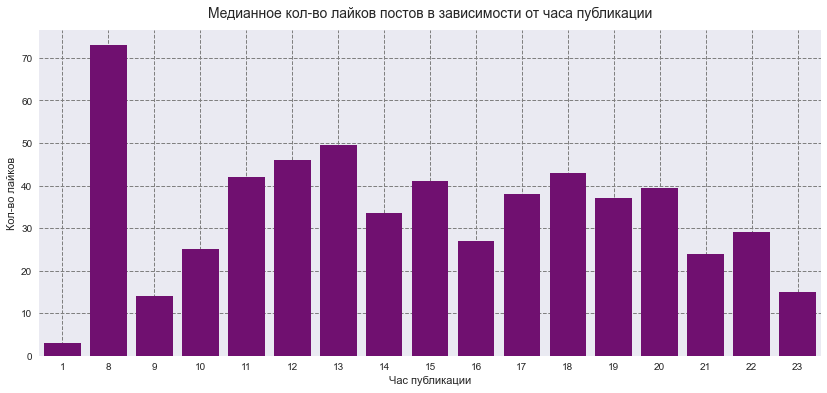

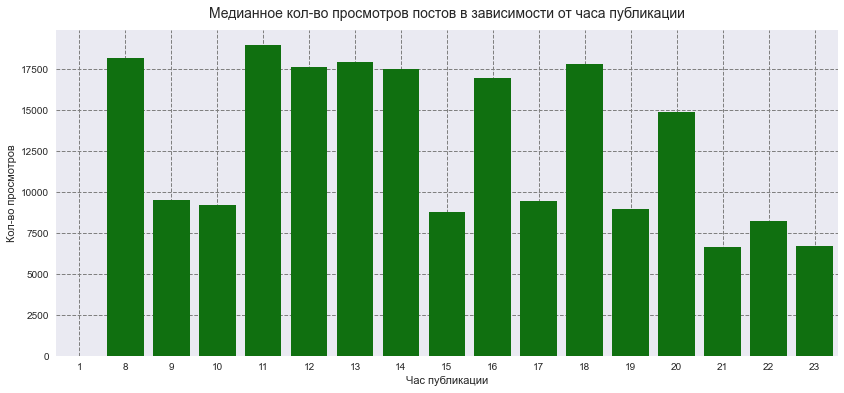

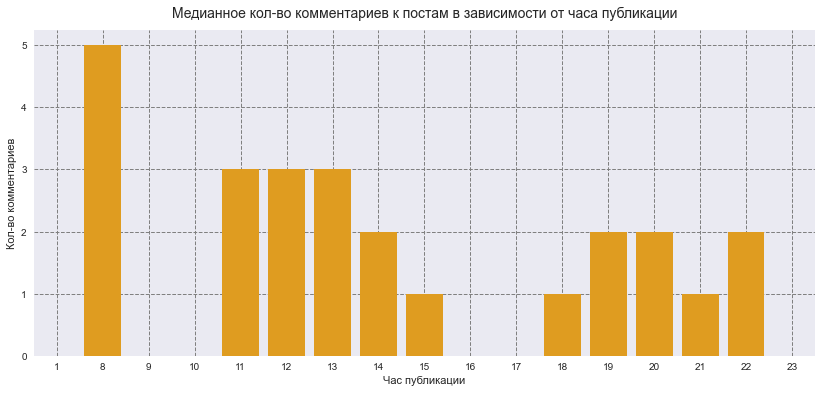

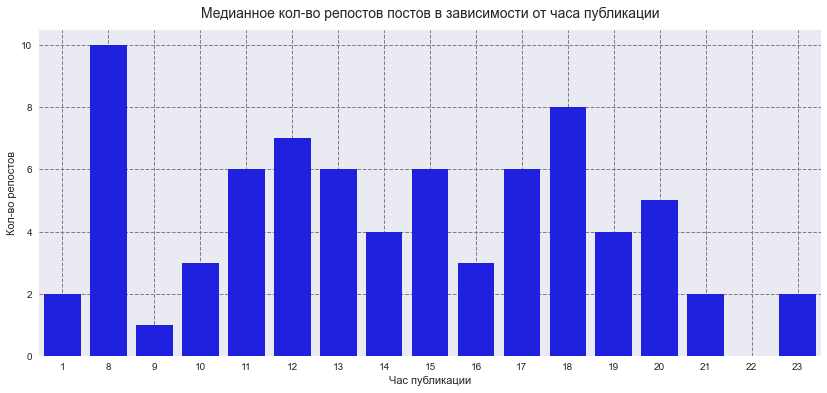

In [105]:
# Списки датафреймов, заголовков и подписей для построения столбчатых диаграмм в цикле
titles = ['Mедианное кол-во лайков постов в зависимости от часа публикации',
          'Медианное кол-во просмотров постов в зависимости от часа публикации',
          'Медианное кол-во комментариев к постам в зависимости от часа публикации',
          'Медианное кол-во репостов постов в зависимости от часа публикации']

df_list = [hours_and_likes, hours_and_views, hours_and_comments, hours_and_reposts]
labels = ['Кол-во лайков', 'Кол-во просмотров', 'Кол-во комментариев', 'Кол-во репостов']
colors = ['purple', 'green', 'orange', 'blue']

# Построение столбчатых диаграм зависимости вовлеченности читателей от часа пуликации
for i_num in range(0, 4):
    fig, ax = plt.subplots(figsize=(14,6))
    data = df_list[i_num]
    sns.barplot(data = data, x = data['hour'], y = data['median'], ax = ax, linewidth = 2, color = colors[i_num])
    ax.set_title(titles[i_num], fontsize = 14, pad = 12)
    ax.set_xlabel('Час публикации')
    ax.set_ylabel(labels[i_num])
    ax.grid(linestyle = '--', color = 'grey')


In [ ]:
2.2. Связь дня недели публикации поста с вовлеченностью читателей. 

In [124]:
# Добавление в датафрейм дня недели публикации 
vk_posts_df['day'] = vk_posts_df['date'].dt.day_name()

# Сортировка по порядку дней недели
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
vk_posts_df['day'] = pd.Categorical(vk_posts_df['day'], categories=days, ordered=True)

# Датафрейм с минимальным, максимальным, средним и медианными показателями кол-ва лайков для разных дней публикаций
days_and_likes = vk_posts_df.groupby('day').agg(['min', 'max', 'mean', 'median'])['likes.count'].reset_index()
days_and_likes 

C:\Users\oluny\AppData\Local\Temp/ipykernel_13808/1141455056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vk_posts_df['day'] = vk_posts_df['date'].dt.day_name()
C:\Users\oluny\AppData\Local\Temp/ipykernel_13808/1141455056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vk_posts_df['day'] = pd.Categorical(vk_posts_df['day'], categories=days, ordered=True)


,day,min,max,mean,median
0,Monday,0,652,54.513736,36.0
1,Tuesday,1,1847,55.417683,30.0
2,Wednesday,0,941,59.162246,35.0
3,Thursday,0,544,53.730475,34.0
4,Friday,0,1113,63.753731,38.0
5,Saturday,1,535,70.371758,46.0
6,Sunday,3,980,102.391586,54.0


In [125]:
# Датафрейм с минимальным, максимальным, средним и медианными показателями кол-ва просмотров для разных дней публикаций
days_and_views = vk_posts_df.groupby('day').agg(['min', 'max', 'mean', 'median'])['likes.count'].reset_index()
days_and_views

,day,min,max,mean,median
0,Monday,0,652,54.513736,36.0
1,Tuesday,1,1847,55.417683,30.0
2,Wednesday,0,941,59.162246,35.0
3,Thursday,0,544,53.730475,34.0
4,Friday,0,1113,63.753731,38.0
5,Saturday,1,535,70.371758,46.0
6,Sunday,3,980,102.391586,54.0


In [126]:
# Датафрейм с минимальным, максимальным, средним и медианными показателями кол-ва комментариев для разных дней публикаций
days_and_comments = vk_posts_df.groupby('day').agg(['min', 'max', 'mean', 'median'])['comments.count'].reset_index()
days_and_comments

,day,min,max,mean,median
0,Monday,0,197,6.048077,2.0
1,Tuesday,0,113,5.580793,1.0
2,Wednesday,0,802,6.449298,1.0
3,Thursday,0,188,8.196018,0.0
4,Friday,0,115,4.537313,0.0
5,Saturday,0,89,6.129683,1.0
6,Sunday,0,133,6.974110,3.0


In [117]:
# Датафрейм с минимальным, максимальным, средним и медианными показателями кол-ва репостов для разных дней публикаций
days_and_reposts = vk_posts_df.groupby('day').agg(['min', 'max', 'mean', 'median'])['reposts.count'].reset_index()
days_and_reposts

,day,min,max,mean,median
0,Friday,0,655,15.188060,5.0
1,Monday,0,1062,14.043956,5.0
2,Saturday,0,428,19.734870,6.0
3,Sunday,0,296,21.012945,8.0
4,Thursday,0,825,14.176110,5.0
5,Tuesday,0,540,14.440549,4.0
6,Wednesday,0,879,14.131045,4.0


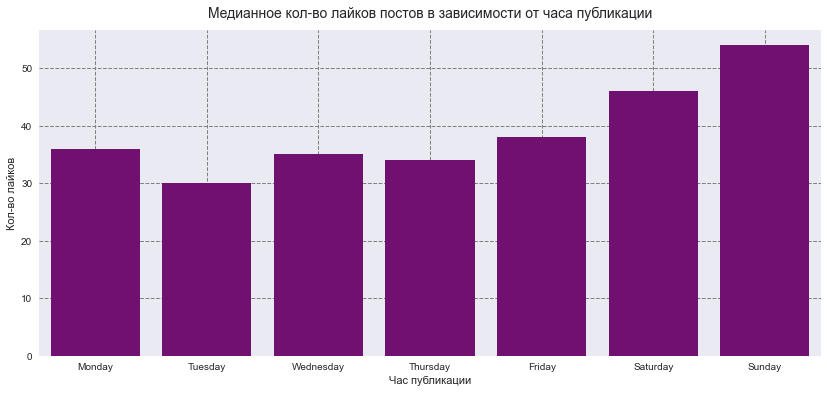

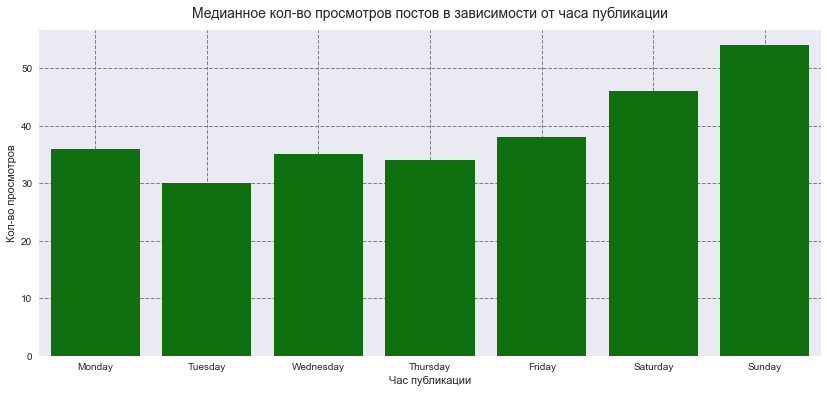

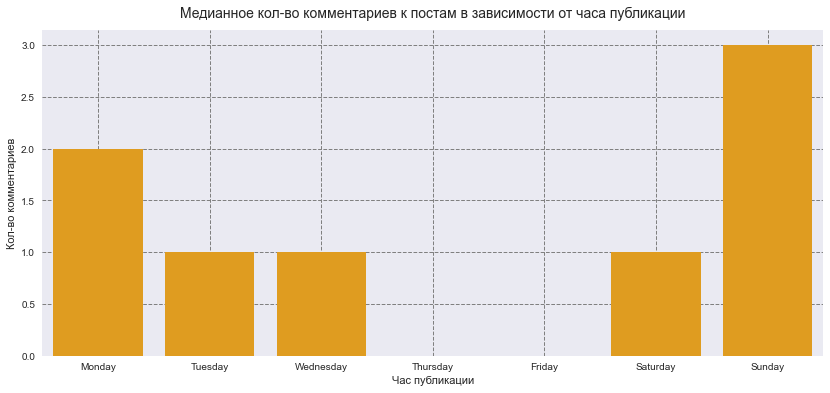

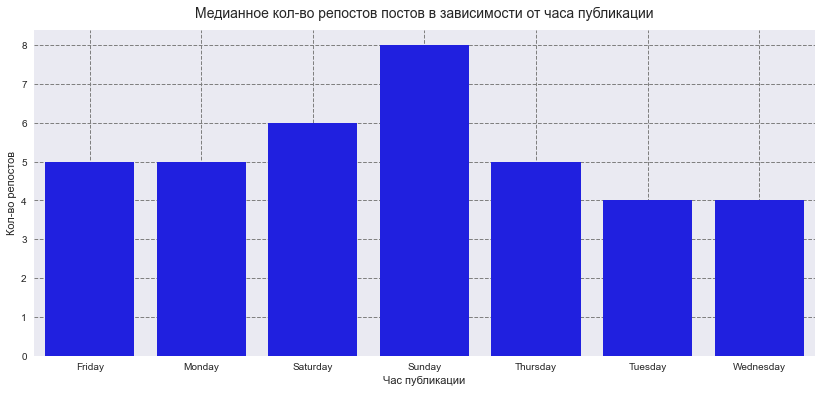

In [127]:
# Построение в цикле столбчатых диаграм зависимости вовлеченности читателей от дня недели публикации
df_list_2 = [days_and_likes, days_and_views, days_and_comments, days_and_reposts]

for i_num in range(0, 4):
    fig, ax = plt.subplots(figsize=(14,6))
    data = df_list_2[i_num]
    sns.barplot(data = data, x = data['day'], y = data['median'], ax = ax, linewidth = 2, color = colors[i_num])
    ax.set_title(titles[i_num], fontsize = 14, pad = 12)
    ax.set_xlabel('Час публикации')
    ax.set_ylabel(labels[i_num])
    ax.grid(linestyle = '--', color = 'grey')


In [ ]:
3. Связь между длиной текста поста и откликами читателей

In [139]:
# Добавление столбца с длиной текста
vk_posts_df.loc[:, 'text_length'] = list(len(x) for x in vk_posts_df['text'])

C:\Users\oluny\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,text,date,comments.count,likes.count,reposts.count,views.count,hour,day,text_length
0,"нет, это не шутка! попробовать 34 курса и инте...",2021-11-01 13:32:31,197,652,1062,97325.0,13,Monday,406
1,"вздрагиваете каждый раз, когда рубль обновляет...",2022-02-07 10:14:33,0,13,4,5932.0,10,Monday,600
2,"огромное количество людей думают, что креативн...",2022-02-06 14:46:58,6,30,20,10996.0,14,Sunday,716
3,если когда-нибудь вам понадобится напугать бре...,2022-02-05 10:31:31,1,67,14,28459.0,10,Saturday,646
4,"написать сценарий, снять пилотную серию и поня...",2022-02-04 12:23:28,4,23,5,15851.0,12,Friday,605
...,...,...,...,...,...,...,...,...,...
3999,#internetmarketing #business #skillbox\n\n15 с...,2016-04-03 14:10:10,0,4,0,NaN,14,Sunday,1667
4000,#internetmarketing #business #skillbox\n\nблес...,2016-04-02 19:04:13,0,1,0,NaN,19,Saturday,106
4001,#movie #internetmarketing #business #skillbox ...,2016-04-02 14:05:19,0,3,0,NaN,14,Saturday,585
4002,#studio #business #skillbox \n\n4 вида рекламн...,2016-04-01 15:50:13,0,6,0,NaN,15,Friday,761


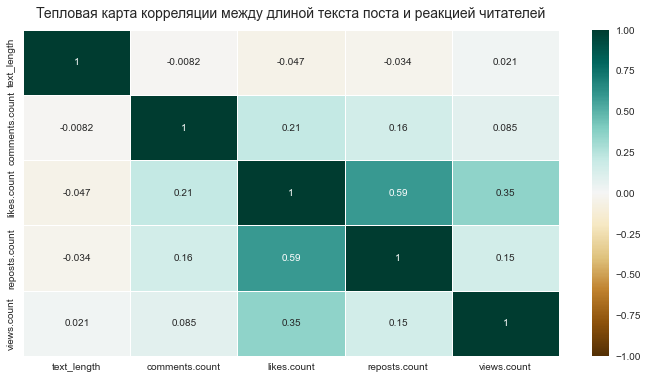

In [140]:
# Тепловая карта корреляции длины текста с колв-ом лайков, просмотров, репостов и комментариев

# датафрейм корреляции данных
df_corr = vk_posts_df[['text_length', 'comments.count', 'likes.count', 'reposts.count', 'views.count']].corr()

# Построение тепловой карты корреляции между признаками
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(df_corr, vmin= -1, vmax = 1, cmap = 'BrBG', annot = True, linewidths = 1)
ax.grid(linestyle = '-', color = 'white')
ax.set_title('Тепловая карта корреляции между длиной текста поста и реакцией читателей',
fontsize = 14, pad = 12)
plt.show()

                                              
## Выводы и рекомендации

На 7 февраля 2022 г. в паблике Skillbox в ВКонтакте опубликовано уже 4004 поста, с момента создания паблика формат хештегов 
к постам менялся, но в последние месяцы возобладал формат совмещения названия Skillbox и темы поста, благодаря чему легко
отыскиваются аналогичные рубрики, подготовленные именно пабликом Skillbox. На текущий момент в данном формате больше всего 
постов у рубрики skillbox_дизайн - 398, на втором месте тематика маркетинга (241), на третьем - программирования(176).

Любопытно, что и посты рубрик дизайна и маркетинга вошли в десятку постов, набравших наибольшее кол-во лайков. Также читателям
больше других понравились посты с конкурсной тематикой, предложением пройти тест, посты с подборками образовательных 
вебинаров. Больше других отклик читателей ввиде комментариев набрали посты рубрик дизайна, маркетинга игр, а также предложения
поучаствовать в конкурсах и баттлах, решить задачу, проявить свою креативность. Более других постов желание сделать репост
вызвали посты на тему дизайна и маркетинга, анонсы и рубрики c подборками #в_закладки_skillbox. Можно порекомендовать и дальше 
предлагать участникам паблика посты с образовательными  материалами, вовлекать их в участие в конкурсах и решениях задач, в том 
числе требующих проявить креативность. Очевидно, что тематика дизайна и маркетинга в настоящее не нуждается в серьезной 
раскрутке, какая явно больше нужна постам, связанными с темами психологии, мультимедиа и игр.

Интересным является вопрос - а в какое время лучше всего публиковать посты в ВКонтакте, если хочется, чтобы их заметили? На 
данную тему есть немало статей, где авторы предлагают выгодные часы и дни недели для публикации постов для получения 
максимального кол-ва постов. В паблике Skillbox наибольший отклик вызывают посты, выложенные в 11, 12, 13 часов, а также 
в 15, 18 и 20, хотя у постов в 15 часов меньше просмотров. Для вовлечения в обмен комментариями под постами самым удачным 
временем является период с 11 до 13 часов включительно. Отдельно хочется обратить внимание на пост  в 8 часов утра, 
он единственный, но он набрал ( и со значительным отрывом) больше других лайков и комментариев, ели судить по медианному кол-ву
лайков и комментариев других постов. На наш взгляд, SMM-отделу нужно попробовать опубликовать еще несколько постов в 8 утра
(благо социальная сеть позволяет публиковать в нужное время отсроченные посты), чтобы посмотреть, будит ли аналогичный 
результат откликов. Не рекомендуется публиковать записи в 9-10 часов утра и после наступления 21.00 на часах. 

Что касается взаимосвязи дня недели публикации и откликов на нее, то наибольшее кол-во лайков и просмотров у постов,
опубликованных в воскресенье, субботу и пятницу, при этом охотнее всего читатели комментируют посты в воскресенье и
понедельник. Если нужно большое кол-во просмотров, лайков и репостов, то не рекомендуется публиковать записи во вторник 
и четверг, а если запланировано участие читателей в комментариях под постом, то не следует публиковать его четверг и пятницу.

Также было любопытно проверить мнение, согласно которому побеждают короткие посты, а записи подлиннее пользуются меньшей
популярности. Что же, коэффициенты корреляции (-0,008, -0,047, -0,034 и 0,021) говорят об отсутствии связи между длиной
текста записи и кол-вом комментариев, лайков, репостов и просмотров. Таким образом, специалисты SMM-отдела могут не бояться
написать текст на предложение больше, если это необходимо для смысла поста. 